

*   Mount your google drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary python libraries.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

•	**Task 1:** Read/Load the dataset file in your program.

In [ ]:
file_path = '/content/drive/MyDrive/LOAN Detection/train_u6lujuX_CVtuZ9i.csv'
data = pd.read_csv(file_path)
data.drop(columns=['Loan_ID'], inplace=True)
print(data.head())
print("\nNumber of Entries in the Dataset:", len(data))

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
Columns with Missing Values:
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term

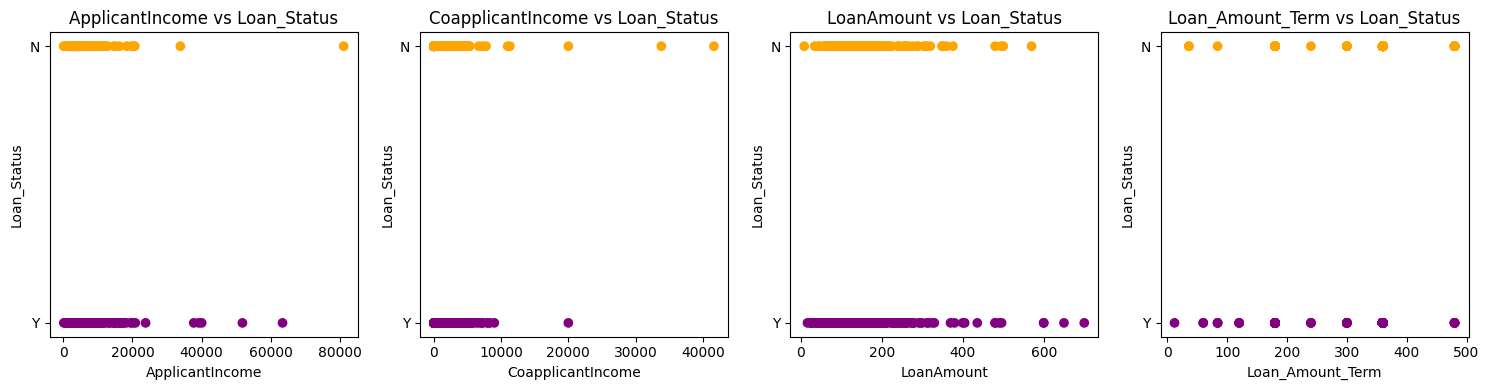

File saved successfully!


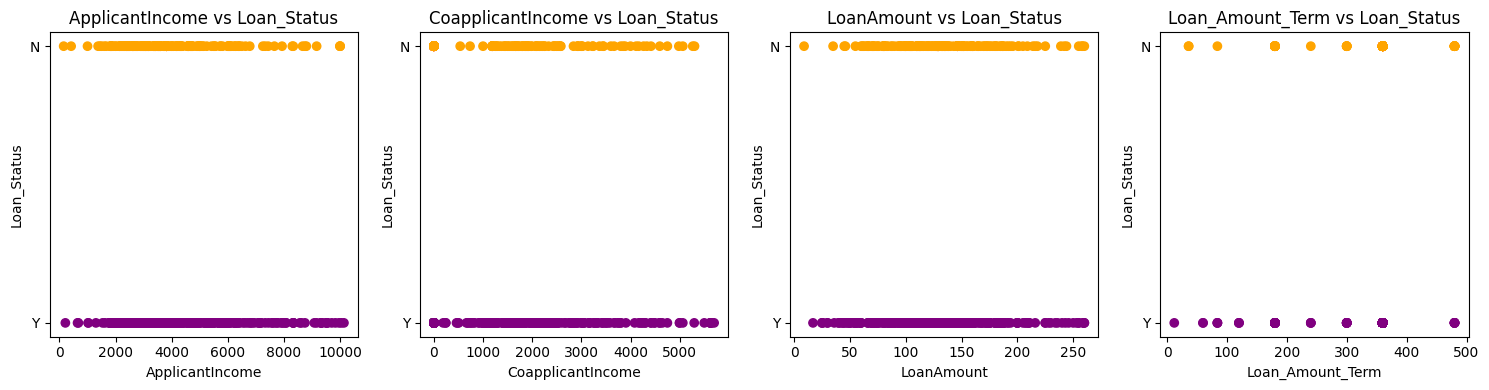

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
data.info()
data.isnull().sum()
missing_values = data.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
total_missing = missing_values.sum()
print("\nTotal Missing Values in the Dataset:", total_missing)
columns_with_missing = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing.index.tolist())

for column in data.columns:
    if data[column].dtype == 'object' or column in ['Credit_History', 'Loan_Amount_Term']:
        data[column].fillna(data[column].mode()[0], inplace=True)
    elif data[column].dtype != 'object' and column not in ['Credit_History', 'Loan_Amount_Term']:
        data[column].fillna(data[column].mean(), inplace=True)

updated_file_path = '/content/drive/MyDrive/LOAN Detection/datasets_updated.csv'
data.to_csv(updated_file_path, index=False)
try:
    pd.read_csv(updated_file_path)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")

first_update = pd.read_csv(updated_file_path)
print("Column names in the dataset:")
print(first_update.columns.tolist())

first_update['Dependents'] = first_update['Dependents'].str.replace('+', '')
first_update['Dependents'] = first_update['Dependents'].astype('int64')

updated_file_path1 = '/content/drive/MyDrive/LOAN Detection/updated_without_plus.csv'
first_update.to_csv(updated_file_path1, index=False)
try:
    pd.read_csv(updated_file_path1)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")

second_update = pd.read_csv(updated_file_path1)
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = second_update[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


duplicate_rows = second_update[first_update.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

second_update['Gender'] = second_update['Gender'].replace({'Male': 0, 'Female': 1})
second_update['Married'] = second_update['Married'].replace({'No': 0, 'Yes': 1})
second_update['Education'] = second_update['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
second_update['Self_Employed'] = second_update['Self_Employed'].replace({'No': 0, 'Yes': 1})
second_update['Property_Area'] = second_update['Property_Area'].replace({'Urban': 0, 'Rural': 1, 'Semiurban': 2})

second_update['Gender'] = second_update['Gender'].astype('int64')
second_update['Married'] = second_update['Married'].astype('int64')
second_update['Education'] = second_update['Education'].astype('int64')
second_update['Self_Employed'] = second_update['Self_Employed'].astype('int64')
second_update['Property_Area'] = second_update['Property_Area'].astype('int64')

columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
target_column = 'Loan_Status'
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 4))
for i, column in enumerate(columns_to_plot):
    axs[i].scatter(second_update[column], second_update[target_column], c=second_update[target_column].map({'Y': 'purple', 'N': 'orange'}))
    axs[i].set_xlabel(column)
    axs[i].set_ylabel(target_column)
    axs[i].set_title(f'{column} vs {target_column}')

plt.tight_layout()
plt.show()

columns_to_replace_outliers = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for column in columns_to_replace_outliers:
    Q1 = second_update[column].quantile(0.25)
    Q3 = second_update[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = second_update[column].median()
    second_update[column] = second_update[column].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)
output_path = '/content/drive/MyDrive/LOAN Detection/removed_outliers.csv'
second_update.to_csv(output_path, index=False)
try:
    pd.read_csv(output_path)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")

third_update = pd.read_csv(output_path)

columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
target_column = 'Loan_Status'
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 4))

for i, column in enumerate(columns_to_plot):
    axs[i].scatter(third_update[column], third_update[target_column], c=third_update[target_column].map({'Y': 'purple', 'N': 'orange'}))
    axs[i].set_xlabel(column)
    axs[i].set_ylabel(target_column)
    axs[i].set_title(f'{column} vs {target_column}')

plt.tight_layout()
plt.show()





•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

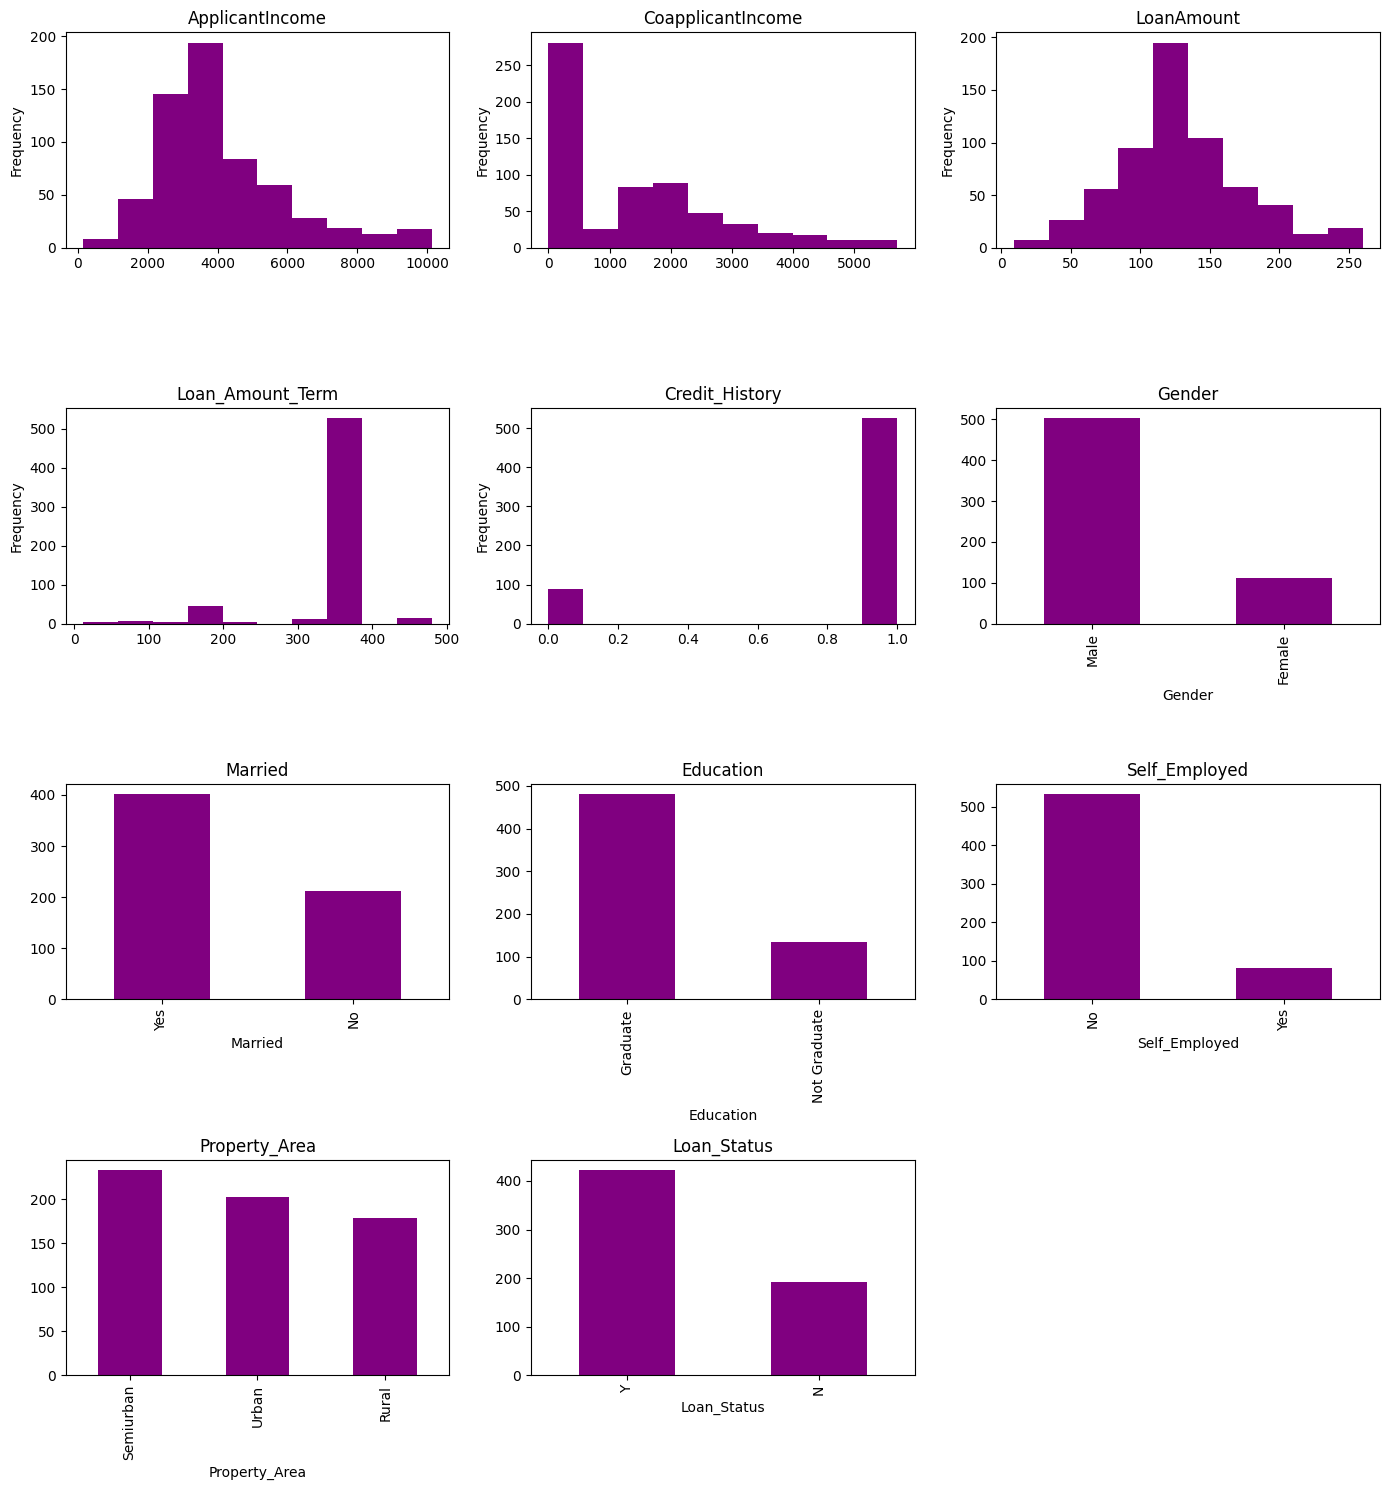

In [ ]:

numerical_columns = third_update.select_dtypes(include='float64').columns
object_columns = first_update.select_dtypes(include='object').columns

num_plots = len(numerical_columns) + len(object_columns)
cols = 3
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(14, 15))

axs = axs.flatten() if rows > 1 else [axs]

for i, column in enumerate(numerical_columns):
    ax = axs[i]
    third_update[column].plot(kind='hist', ax=ax, title=column, color='purple')

for i, column in enumerate(object_columns, start=len(numerical_columns)):
    ax = axs[i]
    value_counts = first_update[column].value_counts()
    value_counts.plot(kind='bar', ax=ax, title=column, color='purple')

for i in range(num_plots, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

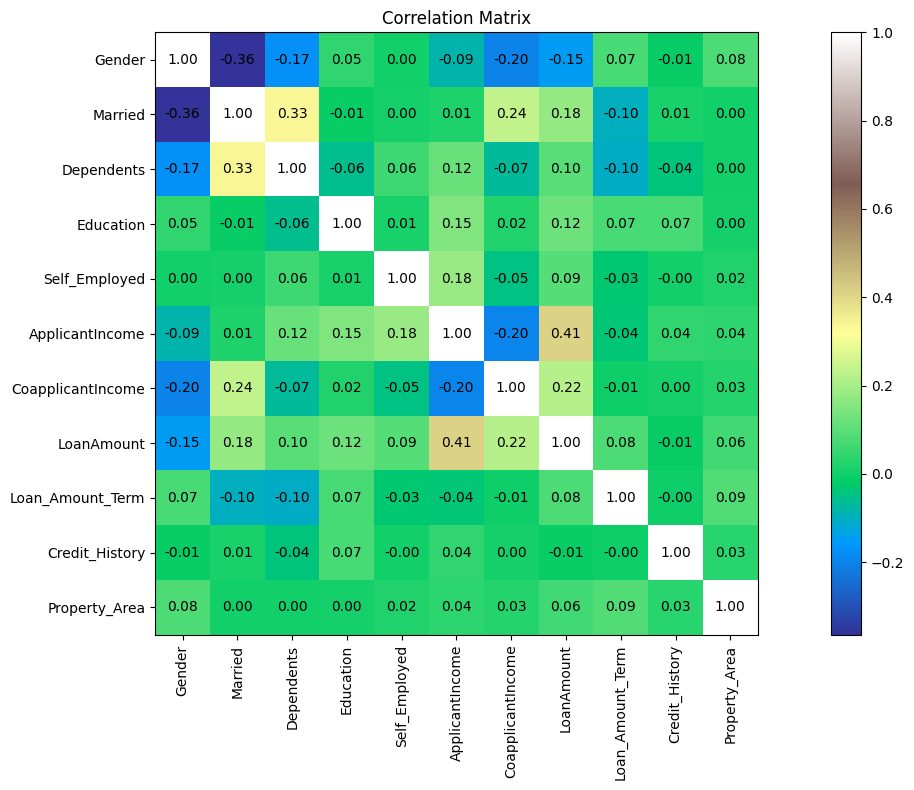

In [ ]:
numeric_data = third_update.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 8))
heatmap = plt.imshow(corr_matrix, cmap='terrain', interpolation='nearest')
plt.colorbar(heatmap)
plt.title('Correlation Matrix')

plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.index)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = MinMaxScaler()
third_update[columns_to_scale] = scaler.fit_transform(third_update[columns_to_scale])
output_path = '/content/drive/MyDrive/LOAN Detection/scaling_in_dataset.csv'
third_update.to_csv(output_path, index=False)
fourth_update = pd.read_csv(output_path)

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [ ]:
X = fourth_update.iloc[:, :11]
y = fourth_update.iloc[:, 11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (491, 11)
Shape of X_test: (123, 11)
Shape of y_train: (491,)
Shape of y_test: (123,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes score: ",nb.score(X_test, y_test))
y_pred = nb.predict(X_test)
prediction_score = metrics.accuracy_score(y_test, y_pred)
print("Prediction Score (Accuracy): ", prediction_score)

Naive Bayes score:  0.8617886178861789
Prediction Score (Accuracy):  0.8617886178861789


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[18 16]
 [ 1 88]]


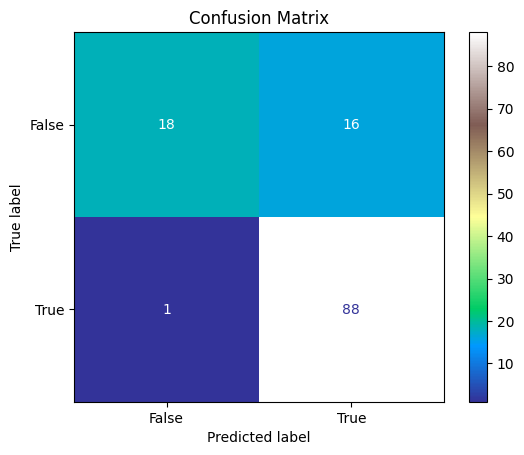

In [ ]:
cm =metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(cmap='terrain')
plt.title('Confusion Matrix')
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label='Y')
recall = metrics.recall_score(y_test, y_pred, pos_label='Y')
f1 = metrics.f1_score(y_test, y_pred, pos_label='Y')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.8618
Precision: 0.8462
Recall: 0.9888
F1-score: 0.9119


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(nb, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.77419355 0.82258065 0.75806452 0.77419355 0.78688525 0.80327869
 0.86885246 0.85245902 0.80327869 0.83606557]
Average CV Score:  0.8079851930195663
Number of CV Scores used in Average:  10
